[Reference](https://levelup.gitconnected.com/12-useful-pandas-scripts-for-financial-time-series-2bcaff3646f9)

# Correlation


In [2]:
import pandas as pd

In [4]:
def get_correlation(df:pd.DataFrame, column1:str, column2:str) -> float:
    """
    Calculates the correlation between two columns in a dataframe.
    :param df: The dataframe containing the columns.
    :param column1: The first column.
    :param column2: The second column.
    :return: The correlation between the two columns.
    """
    return df[column1].corr(df[column2])

# Lagging Correlation


In [5]:
def get_lagging_correlation(df:pd.DataFrame, column1:str, column2:str, lag: int) -> float:
    """
    Calculates the correlation between two columns in a dataframe with certain lag
    :param df: The dataframe containing the columns.
    :param column1: The first column.
    :param column2: The lagging column.
    :return: The correlation between the two columns.
    """
    return df[column1].corr(df[column2].shift(lag))

# Fill Missing Values


In [7]:
def impute_values_with_linear_regression(df:pd.DataFrame, column: str) -> pd.Series:
    """
    Fills NaN values using linear regression interpolation.
    :param df: The dataframe containing the column.
    :param column: The column to be imputed.
    :return: The dataframe with the imputed values.
    """
    return df[column].interpolate()

#Get RSI


In [8]:
def get_relative_strength_index(df:pd.DataFrame, column:str, periods:int) -> pd.DataFrame:
    """
    Returns the Relative Strength Index for a given column in a dataframe.
    """
    close_delta = df[column].diff()

    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        
    rs = ma_up / ma_down
    df['{}_rsi'.format(column)] = 100 - (100/(1 + rs))
    
    return df

# Get Bollinger Bands


In [9]:
def get_bollinger_bands(df:pd.DataFrame, column:str, period:int, std_dev:float) -> pd.DataFrame:
    """
    Calculates the Bollinger Bands for a given column in a dataframe.
    :param df: The dataframe containing the column.
    :param column: The column to be used.
    :param period: The period to be used.
    :return: The dataframe with the Bollinger Bands columns.
    """

    df['{}_upper_band'.format(column)] = df[column].rolling(period).mean() + (df[column].rolling(period).std() * std_dev)
    df['{}_lower_band'.format(column)] = df[column].rolling(period).mean() - (df[column].rolling(period).std() * std_dev)
    return df

# Get MACD


In [10]:
def get_macd(df, column, period1, period2, period3):
    """
    Calculates the MACD for a given column in a dataframe.
    :param df: The dataframe containing the column.
    :param column: The column to be used.
    :param period1: The first period to be used.
    :param period2: The second period to be used.
    :param period3: The third period to be used.
    """

    df['{}_macd'.format(column)] = df[column].ewm(span=period1).mean() - df[column].ewm(span=period2).mean()
    df['{}_signal'.format(column)] = df['{}_macd'.format(column)].ewm(span=period3).mean()
    return df

# Get an Exponential Moving Average


In [11]:
def get_exponential_moving_average_over_period(df:pd.DataFrame, column:str, period:int) -> pd.Series:
    """
    Calculates the exponential moving average over a given period.
    :param df: The dataframe containing the column.
    :param column: The column to be used.
    :param period: The period to be used.
    :return: The series with the moving average column.
    
    """
    return df[column].ewm(span=period).mean()

# Get Return Percentage Over Period


In [12]:
def calculate_return_percentage(starting_value, ending_value, period):
    """
    Calculates the return percentage over period.
    :param starting_value: The starting value.
    :param ending_value: The ending value.
    :param period: The period.
    :return: The annual return percentage.
    """
    if period <= 0:
        raise ValueError("Period must be greater than 0")

    return_value = (ending_value - starting_value) / starting_value
    return (1 + return_value) ** (1 / period) - 1

# Get Logarithmic Returns


In [14]:
import numpy as np 

In [15]:
def get_log_returns(df, column):
    """
    Calculates the log returns for a given column in a dataframe.
    :param df: The dataframe containing the column.
    :param column: The column to be used.
    :return: The series with the log returns column.
    """
    returns = np.log(df[column]/df[column].shift(1))
    return returns.fillna(0, inplace=True)

# Calculate Volatility


In [16]:
def calculate_volatility(df, periods, column):
    """
    Calculates the volatility for a given column in a dataframe.
    
    df: The dataframe containing the column.
    periods: The periods to be used.
    column: The column to be used.
    :return: The volatility series column and mean volatility.
    """
    returns = get_log_returns(df, column)

    volatility_series = returns.rolling(window=periods).std() * np.sqrt(periods)

    return volatility_series, volatility_series.mean()

# Get Sharpe Ratio

In [17]:
def get_sharpe_ratio(df, periods, column):
    """
    Calculates the Sharpe ratio for a given column in a dataframe.
    :param df: The dataframe containing the column.
    :param periods: The periods to be used.
    :param column: The column to be used.
    :return: The Sharpe ratio.
    """
    returns = get_log_returns(df, column)
    volatility = calculate_volatility(df, periods, column)[0]

    return returns.mean()/volatility

# Bonus: Lets Plot Some


In [23]:
!pip install yfinance

In [25]:
import matplotlib.pyplot as plt
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


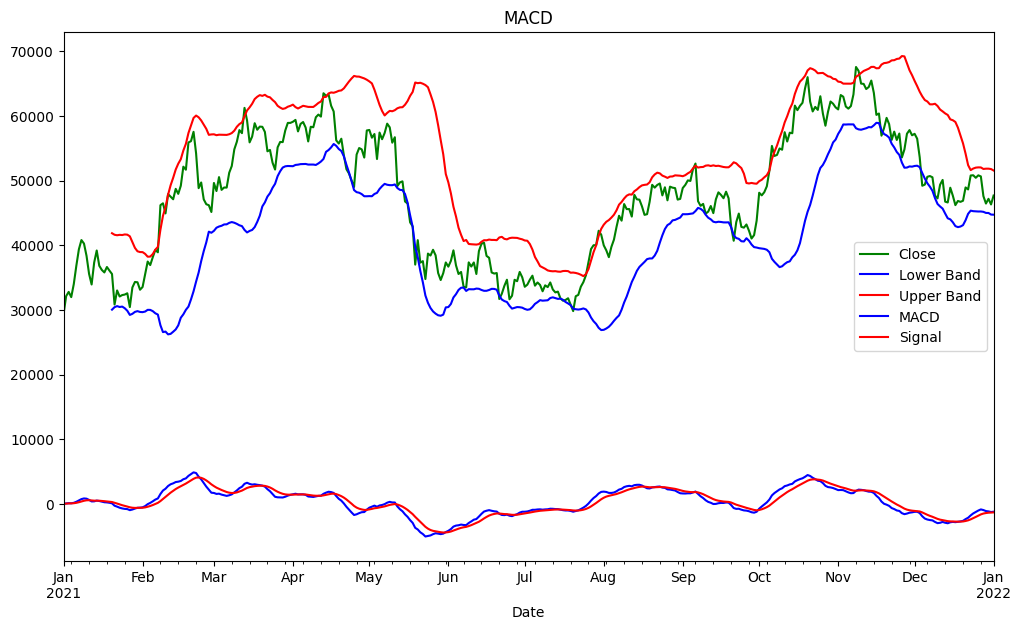

In [26]:
def plot_bollinger_bands(df, column, period, std_dev):
    """
    Plots the Bollinger Bands for a given column in a dataframe.
    """
    df = get_bollinger_bands(df, column, period, std_dev)

    ax = df[f'{column}_lower_band'].plot(color='blue', label='Lower Band')
    df[f'{column}_upper_band'].plot(color='red', label='Upper Band', ax=ax)

    return ax

def plot_macd(df, column, period1, period2, period3):
    """
    Plots the MACD for a given column in a dataframe.
    """
    df = get_macd(df, column, period1, period2, period3)

    ax = df[f'{column}_macd'].plot(color='blue', label='MACD')
    df[f'{column}_signal'].plot(color='red', label='Signal', ax=ax)
    
    return ax


if __name__ == '__main__':
    df = yf.download('BTC-USD', start='2021-01-01', end='2022-01-01')

    fig = plt.figure(figsize=(12, 7), dpi=100, facecolor='w', edgecolor='k', frameon=True)
    
    ax1 = df['Close'].plot(color='green', label='Close')
    ax2 = plot_bollinger_bands(df, 'Close', 20, 2)
    ax3 = plot_macd(df, 'Close', 12, 26, 9)
    
    ax1.set_title('BTC-USD')
    ax2.set_title('Bollinger Bands')
    ax3.set_title('MACD')

    plt.legend(loc='best')
    plt.savefig('rsi_macd_bollinger.png')